<center><h1>Rafinha dos dados</h1></center>

<img src="logo_rafinha.png" style='height: 530px'>

# Alcolismo em jovens - parte 1

Uma escola tem tido problema de alcolismo precoce em alguns de seus estudantes.
Para os casos *já detectados*, essa escola contratou uma psicóloga para conversar e auxiliar esses estudantes a reconhecerem e superarem esse problema

Entretanto, ela está buscando **ajudar outras escolas**: A partir dos seus dados, ela quer encontrar formas de orientar outras escolas a, sem pesquisar a fundo a vida dos estudantes, descubrir quais podem estar tendo problemas de alcoolismo, e já encaminhá-los para terapia psicológica, a fim de mitigar o problema o quanto antes.

Para isso, ela começou um dados iniciais que possam ser comparáveis entre escolas, e que ela acredita que são de fácil obtenção:
 - Quantidade de vezes por semana que o estudante sai por semana, de acordo com os pais
 - Quantidade de faltas escolares no últimos ano
 
Para construir esse modelo, a escola coletou alguns dados próprios:

In [1]:
import pandas as pd

df = pd.read_csv('2feats.csv')
df

goout  absences  target
0        4         6       0
1        3         4       0
2        2        10       0
3        2         2       0
4        2         4       0
..     ...       ...     ...
390      4        11       1
391      5         3       1
392      3         3       0
393      1         0       1
394      3         5       0

[395 rows x 3 columns]

Na tabela acima, cada linha corresponde a um estudante e as colunas são:
 - **goout**: A quantidade de vezes que o estudante sai por semana, numa escala de 1 a 5
 - **absences**: Número de faltas do último ano
 - **target**: 1 caso seja um estudante alcolista, 0 caso contrário

O *sobrinho* do diretor da escola, **Enzo**(óbvio!) que estava começando a estudar ciência de dados, ouviu o problema, e decidiu **contruir um modelo** a partir desses dados. Assim, bastaria *executar o modelo* para novas informações, e esse modelo <u>automaticamente</u> diria se aquele estudante possui um problema de alcolismo ou não.

Primeiro, ele separou as *variáveis preditivas*, saídas e faltas, em uma lista, e a *variável resposta*, alcolista ou não, em tabelas distintas

In [2]:
X = df[['goout','absences']]
y = df['target']

Depois, ele construiu um modelo de árvore de decisão, que ele acabara de descobrir em um forum de internet
Assim, na lata, sem olhar com mais calma essas variáveis nem nada.

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [4]:
from sklearn.tree import plot_tree
plot_tree(dt, impurity=False);

### E pronto! O modelo estava treinado!
Mas será que ele é bom?

Para verificar, ele usou algumas métricas que ele viu naquele mesmo forum:
 - **Precision**: De todos que ele disse que eram alcolistas, quantos *realmente* eram?
 - **Recall**: De todos estudantes alcolistas, quantos ele acertou?

In [5]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y, dt.predict(X)))
print(recall_score(y, dt.predict(X)))

0.9259259259259259
0.30864197530864196


Ou seja:
 - De todos estudantes que ele disse que eram alcolistas, 92% realmente eram! 
 - Infelizmente, isso correspondia apenas a 30% dos alcolistas, 
 
Mas já era um bom começo! Ele aplicou o modelo em dados de outras escolas e entregou os resultados super confiante para o seu tio!

# Mas no dia seguinte.........

O tio veio pra ele e disse que os outros diretores falaram que aquelas precições não faziam O MENOR SENTIDO, que eles conheciam os alunos deles e o modelo não correspondia com a realidade!!!

Onde Enzo poderia ter errado???????
Assim, ele decidiu olhar com um pouco mais de calma aquelas variáveis...

Pra começar, ele começou usando umas novas funções para fazer gráficos que ele tinha aprendido:

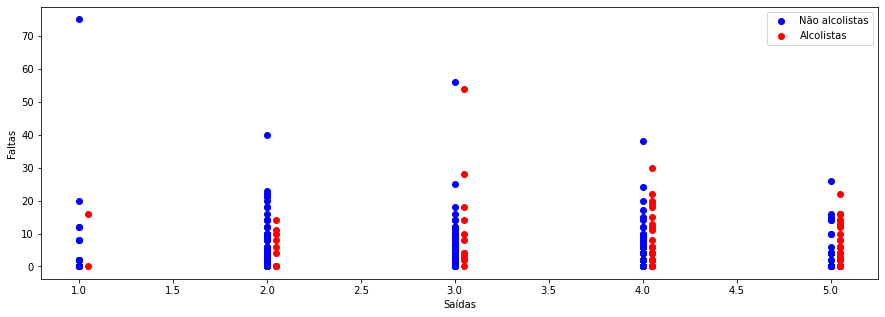

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
alcool  = y==1
nalcool = y==0
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend();

Realmente olhando para os dados, parecia um problema bem mais complexo do que a princípio..mas como seu modelo estava funcionando? Procurando nas internets, ele conseguiu adaptar um código para mostrar a **SUPERFÍCIE DE DECISÃO** do seu modelo!

Nesse gráfico, ele EXTRAPOLARIA seu modelo para todas as possibilidades, e pintaria o fundo de acordo com a decisão que o modelo tomaria naquele caso hipotético. Como sua tabela tinha somente 2 colunas, pareceu uma ótima análise.

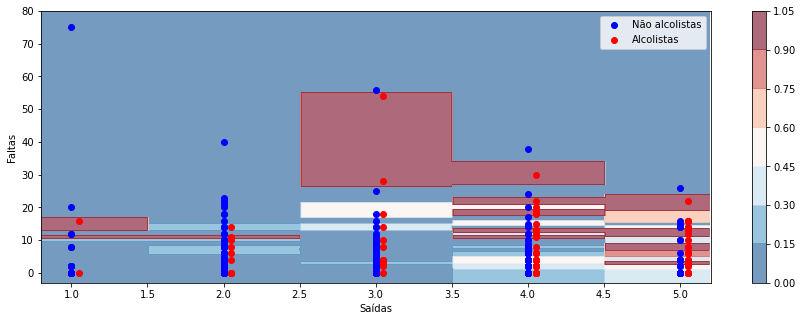

In [7]:
import numpy as np

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.01)
)
zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

Que modelo doidão!!!
Tem um ponto vermelho que sai uma vez por semana com pouco menos de 20 faltas, e o modelo diz que todo mundo assim é alcolista

Tem um ponto azul que sai todo dia, com quase 30 faltas, e o modelo diz que todo mundo que falta MAIS QUE ELE não é alcolista! A intuição não está fazendo sentido!

E por que parece que o modelo prevê em regiões retangulares? O que significa isso?

Parece que tem alguma coisa muito errada! 

<hr>
Sem saber o que fazer, **Enzo** procurou ajuda da sua amiga **Valentina**, muito mais experiente que ele em ciência de dados.

Ela explicou pra ele que ele não poderia usar o modelo de árvore de decisão dessa maneira.

A árvore de decisão, explicou nossa valente amiga, procura sequencialmente *"quebrar"* nossas variáveis em <u>um único ponto</u>, sendo que acima daquele ponto os dados percencem a uma **classe**, por exemplo, estudantes alcolistas, e abaixo daquele ponto, a outra classe.

Enzo não entendeu nada

Então Valentina o auxiliou a refazer sua figura, mas variando um parâmetro da árvore de decisão: **max_depth**

#### max_depth=1

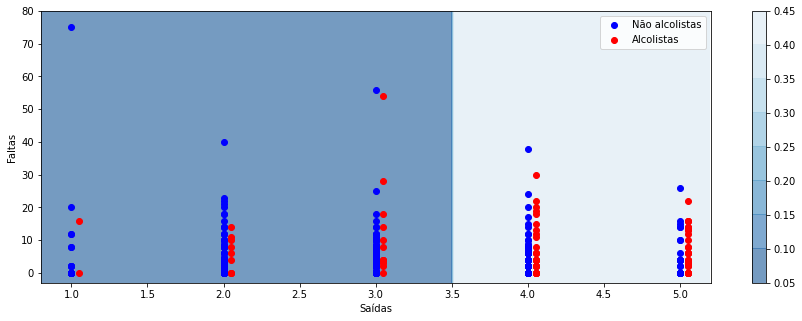

In [8]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X,y)

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.01)
)
zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

 - Está vendo? - Disse Valentina - quando a sua árvore tem profundidade 1, ela faz somente uma quebra. Veja, você pode "ver" sua árvore assim:

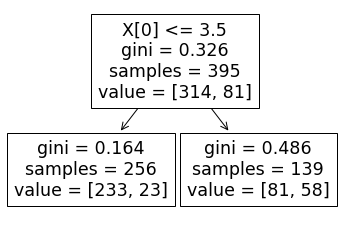

In [9]:
from sklearn.tree import plot_tree

plot_tree(dt);

Olhe para o primeiro quadrado em cima:<br/>
> **X[0] <= 3.5** - ou seja, quando sua **primeira variável (variável 0)**, ou seja, a **Quantidade de saídas** for menor que 3.5, vá para a esquerda<br/>
**samples = 395** Quer dizer que você tinha 395 estudantes, no seu conjunto, sendo <br/>
**value = [314,81]** 314 não alcolistas e 81 alcolistas.


> Depois, à esquerda, temos:<br/>
**samples = 256** - ou seja, 256 estudantes saem menos de 3.5 vezes por semana, e desses<br/>
**values = [233,23]** 233 não não alcolistas e 33 são alcolistas


> Já à direita:<br/>
**samples = 139** - ou seja, 139 estudantes saem mais de 3.5 vezes por semana, e desses<br/>
**values = [81,58]** 81 não não alcolistas e 58 são alcolistas

 - Mas e esse tal de gini? - perguntou Enzo
 - Esquece isso por enquanto. É uma medida do quão bem essa regra separa as classes. Quanto mais próximo de 1, melhor. Mas depois eu te explico isso com calma. Se quiser você desenha sem isso assim:
 
Ah, e note que **saídas = 3.5** é justamente onde apareceu o corte no gráfico!
Vamos aproveitar e plotar junto!

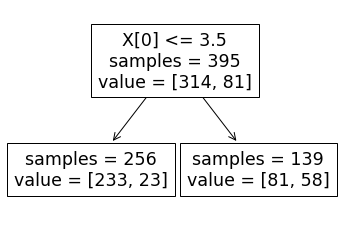

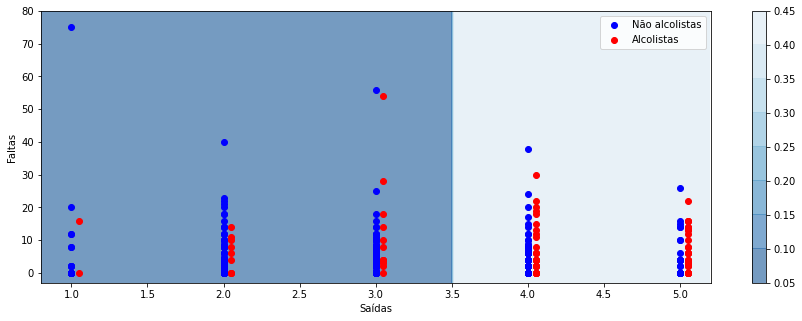

In [10]:
plot_tree(dt, impurity=False);

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

<hr/>

Enzo ainda estava inconformado.
 - Tá, mas como isso me ajuda? Esse único corte não é um bom modelo!
 
 - Ok, mas seu modelo antigo também não era. Ele tinha feito tantos cortes que ele tinha DECORADO seu conjunto de dados, ao invés de aprendido com ele. Ele fazia uma nova regra por causa de um único estudante que aparecia com um dado comportamento!
 
 - Aprender não é decorar, aprender é generalizar o máximo que faça sentido. Esse com uma única regra, generalizou demais. Estamos chamando de alcolistas qualquer um que saia mais que 3 vezes por semana, isso é até preconceituoso. Agora alguém não pode ter vida social?
 
 - Mas vamos ver o que acontece quando colocamos mais regras!

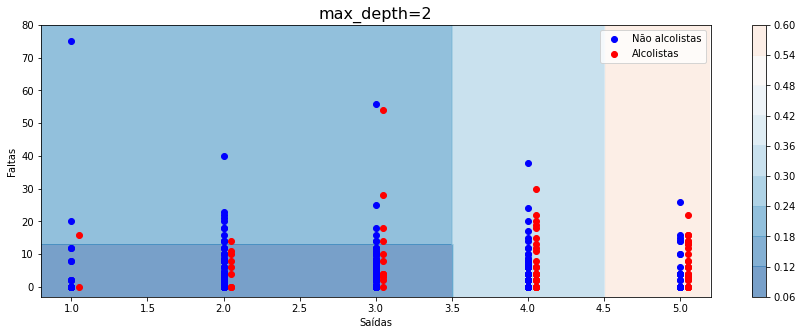

In [11]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.01)
)
zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.title('max_depth=2',fontsize=16)
plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

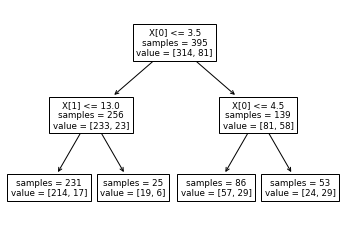

In [12]:
plot_tree(dt, impurity=False);

Olha!!! Agora o modelo não tem tanta certeza do que responder quando a pessoa sai 4 vezes por semana. Ele está sendo um pouco menos agressivo na generalização. Vamos colocar um pouco mais....

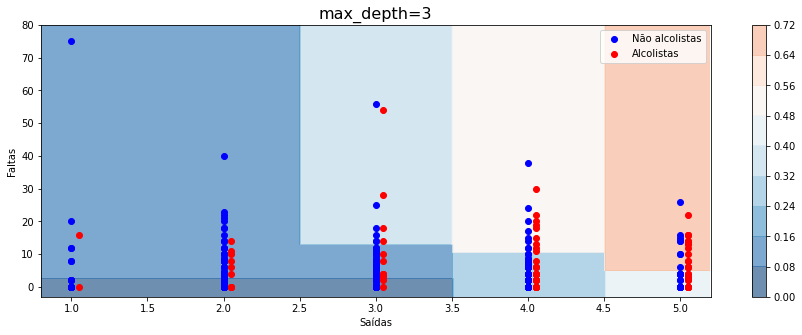

In [13]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.01)
)
zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.title('max_depth=3',fontsize=16)
plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

Olha que barato! Quanto mais vezes a pessoa sai, menos faltas ela precisa ter tido para o modelo considerá-la um alcolista.

Vamos só mais 1....

In [14]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X,y)

xx,yy = np.meshgrid(
    np.arange(0.8,5.2,0.01),
    np.arange(-3,80,0.01)
)
zz = dt.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

plt.figure(figsize=(15,5))
plt.plot(X['goout'][nalcool]    ,X['absences'][nalcool],'bo',label='Não alcolistas')
plt.plot(X['goout'][ alcool]+.05,X['absences'][ alcool],'ro',label='Alcolistas')
plt.contourf(xx,yy,zz, cmap='RdBu_r', alpha=.6,vmin=0,vmax=1)
plt.colorbar()

plt.title('max_depth=4',fontsize=16)
plt.xlabel('Saídas')
plt.ylabel('Faltas')
plt.legend()
plt.xlim(0.8,5.2)
plt.ylim(-3,80);

Agora **PARECE** que está acontecendo o mesmo problema que você me descreveu. Parece que o modelo está ficando muito complexo

 - Ok, mas como assim "parece"? Como eu sei quando parar ou se está bom? Não sei se tenho toda essa intuição!
 
Você não disse que estava olhando para **precision/recall**? Podemos seguir por aí

### Já aviso de antemão: Há formas BEM melhores de fazer isso. Mas como você está começando, vamos por aí...

pra cada um dos modelos com diferentes max_depths que você fez, vamos ver como ficam essas métricas

<hr/>

AAAAAAAHHHHHHH<br/>
E QUASE ME ESQUEÇO! NÃO FAÇA ISSO COMIGO!<br/>
NUNCA, JAMAIS TREINE SEU MODELO EM TODOS SEUS DADOS SEM UMA BOA RAZÃO!

Você precisa deixar um pedacinho pra validar. Se você olhar pras suas métricas nos mesmo dados que seu modelo já aprendeu, você está "roubando", não generalizando. É como colar na prova

Vamos primeiro separar seus dados em **conjunto treino** e **conjunto teste**

In [15]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=.5)

Agora verificamos as métricas **no conjunto teste**, que o modelo nunca viu antes, pra cada parâmetro

In [16]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_treino, y_treino)
precision = precision_score(y_teste, dt.predict(X_teste))
recall = recall_score(y_teste, dt.predict(X_teste))
print('max_depth=2     %5.2f     %5.2f'%(precision,recall))

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_treino, y_treino)
precision = precision_score(y_teste, dt.predict(X_teste))
recall = recall_score(y_teste, dt.predict(X_teste))
print('max_depth=3     %5.2f     %5.2f'%(precision,recall))

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_treino, y_treino)
precision = precision_score(y_teste, dt.predict(X_teste))
recall = recall_score(y_teste, dt.predict(X_teste))
print('max_depth=4     %5.2f     %5.2f'%(precision,recall))

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_treino, y_treino)
precision = precision_score(y_teste, dt.predict(X_teste))
recall = recall_score(y_teste, dt.predict(X_teste))
print('max_depth=5     %5.2f     %5.2f'%(precision,recall))

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_treino, y_treino)
precision = precision_score(y_teste, dt.predict(X_teste))
recall = recall_score(y_teste, dt.predict(X_teste))
print('max_depth=6     %5.2f     %5.2f'%(precision,recall))

max_depth=2      0.27      0.08
max_depth=3      0.43      0.35
max_depth=4      0.40      0.27
max_depth=5      0.37      0.27
max_depth=6      0.37      0.27


 - Olha como em max_depth=3 parece que a precision E o recall chegaram num máximo? Parece promissor - Disse Valentina
 - Mas e se eles tiverem máximos em lugares diferentes? E quanto código pra isso! - Disse Enzo - Não tem como fazer mais fácil?
 - Como você reclama!! Pra tirar sua dúvida, vamos usar uma outra métrica, a <u>média geométrica</u> do precision e do recall..assim se um cai demais, puxa o outro. Só vai ter um bom valor quando os 2 são bons. Chama-se F1.
 - E pro código, saca só o que podemos fazer
 
$F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [17]:
max_depths = [2,3,4,5,6,7]
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_treino, y_treino)
    precision = precision_score(y_teste, dt.predict(X_teste))
    recall = recall_score(y_teste, dt.predict(X_teste))
    f1 = 2/((1/precision)+(1/recall))
    print('max_depth=%2d     %5.2f     %5.2f    %5.2f'%(max_depth,precision,recall,f1))

max_depth= 2      0.27      0.08     0.12
max_depth= 3      0.43      0.35     0.39
max_depth= 4      0.40      0.27     0.32
max_depth= 5      0.37      0.27     0.31
max_depth= 6      0.37      0.27     0.31
max_depth= 7      0.41      0.24     0.31


 - Viu só? O melhor $F_1$ é em max_depth=3 mesmo!
 - Na verdade, o certo, é olhar pra uma outra métrica chamada **AUC**, mas isso é papo pro nosso próximo encontro!
 
 - Agora ajusta esse modelo e vai lá mostrá-lo pro seu tio!

 - E lembre-se de apresentá-lo de forma que ele entenda!
 
No modelo:
 - De todos estudantes que ele disse que eram alcolistas, aproximadamente 49% realmente são! 
 - E isso correspondia apenas a 41% do total de alcolistas, 